EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: # Create a custom Titanic-like dataset
data = pd.DataFrame({
     'PassengerId': np.arange(1, 101),
     'Survived': np.random.choice([0, 1], size=100, p=[0.6, 0.4]),
     'Pclass': np.random.choice([1, 2, 3], size=100, p=[0.2, 0.3, 0.5]),
     'Name': [f"Passenger {i}" for i in range(1, 101)],
     'Sex': np.random.choice(['male', 'female'], size=100, p=[0.5, 0.5]),
     'Age': np.random.randint(1, 80, size=100),
     'SibSp': np.random.randint(0, 5, size=100),
     'Parch': np.random.randint(0, 5, size=100),
     'Ticket': [f"TCKT-{i}" for i in range(1, 101)],
     'Fare': np.round(np.random.uniform(10, 100, size=100), 2),
     'Embarked': np.random.choice(['C', 'Q', 'S'], size=100, p=[0.3, 0.2, 0.5])

})
print(data.head())

   PassengerId  Survived  Pclass         Name     Sex  Age  SibSp  Parch  \
0            1         0       1  Passenger 1    male   33      2      3   
1            2         1       2  Passenger 2  female   67      3      2   
2            3         0       1  Passenger 3    male   66      1      2   
3            4         0       1  Passenger 4    male   37      2      0   
4            5         1       3  Passenger 5    male   15      1      0   

   Ticket   Fare Embarked  
0  TCKT-1  37.02        C  
1  TCKT-2  70.41        S  
2  TCKT-3  20.91        S  
3  TCKT-4  52.65        S  
4  TCKT-5  78.83        S  


In [ ]:
# Save the dataset to a CSV file
data.to_csv("custom_titanic.csv", index=False)

In [ ]:
# Load the dataset
# Display the first few rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,1,Passenger 1,male,33,2,3,TCKT-1,37.02,C
1,2,1,2,Passenger 2,female,67,3,2,TCKT-2,70.41,S
2,3,0,1,Passenger 3,male,66,1,2,TCKT-3,20.91,S
3,4,0,1,Passenger 4,male,37,2,0,TCKT-4,52.65,S
4,5,1,3,Passenger 5,male,15,1,0,TCKT-5,78.83,S


In [ ]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  100 non-null    int64  
 1   Survived     100 non-null    int64  
 2   Pclass       100 non-null    int64  
 3   Name         100 non-null    object 
 4   Sex          100 non-null    object 
 5   Age          100 non-null    int64  
 6   SibSp        100 non-null    int64  
 7   Parch        100 non-null    int64  
 8   Ticket       100 non-null    object 
 9   Fare         100 non-null    float64
 10  Embarked     100 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 8.7+ KB


#This dataset has no missing value

# 2. Descriptive Statistics

In [ ]:
# Summary statistics for numerical features
summary_stats = data[['Age', 'Fare']].describe()

In [ ]:
# Frequency distribution for categorical features
pclass_dist = data['Pclass'].value_counts()
sex_dist = data['Sex'].value_counts()
embarked_dist = data['Embarked'].value_counts()

# 3. Data Visualization

In [ ]:
sns.set_style("whitegrid")

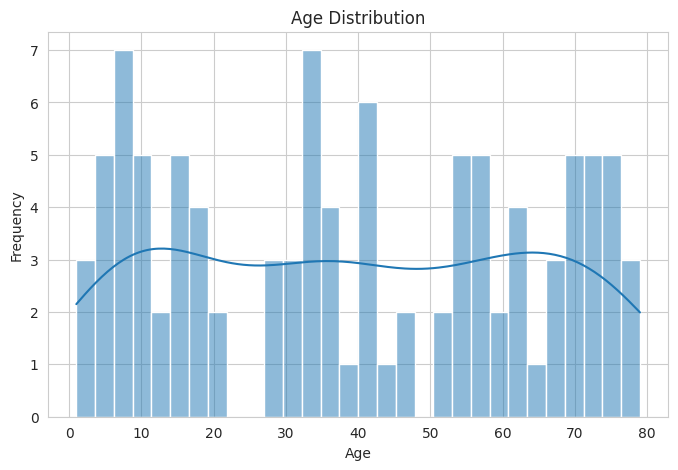

In [ ]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

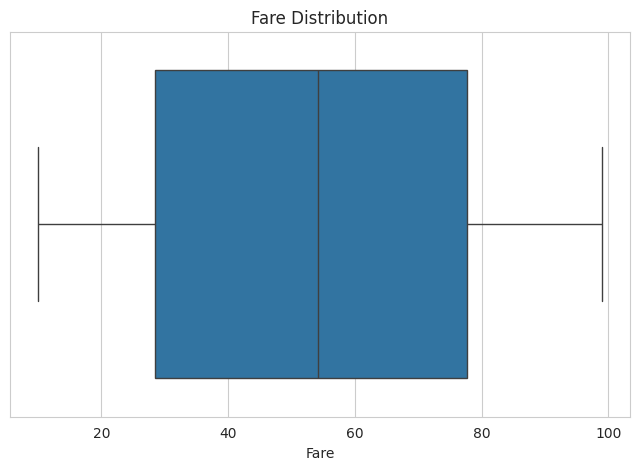

In [ ]:
# Boxplot for Fare
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Fare'])
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

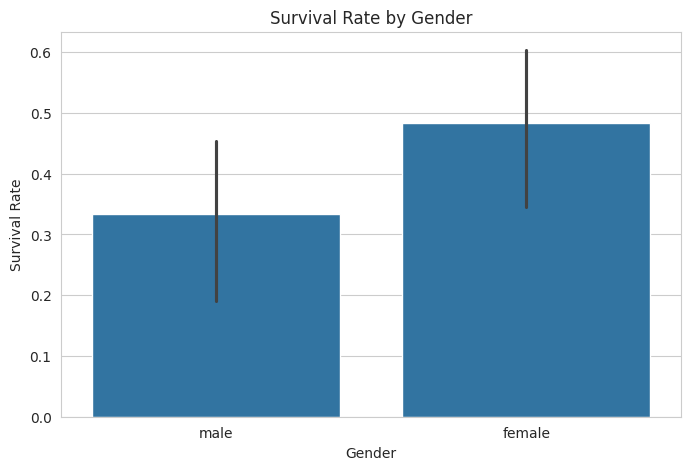

In [ ]:
# Survival rate by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

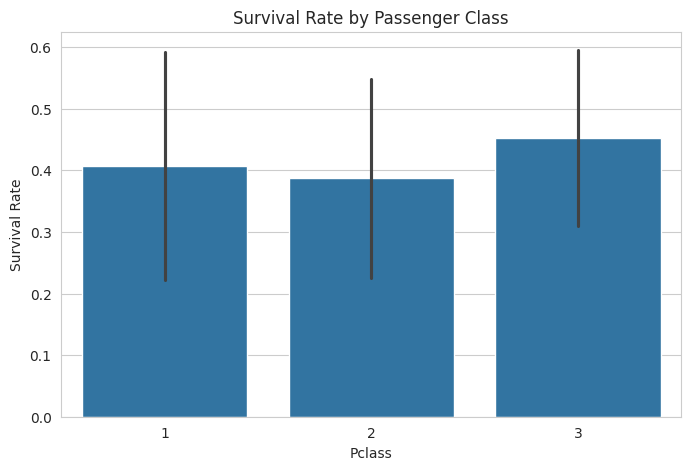

In [ ]:
# Survival rate by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.show()

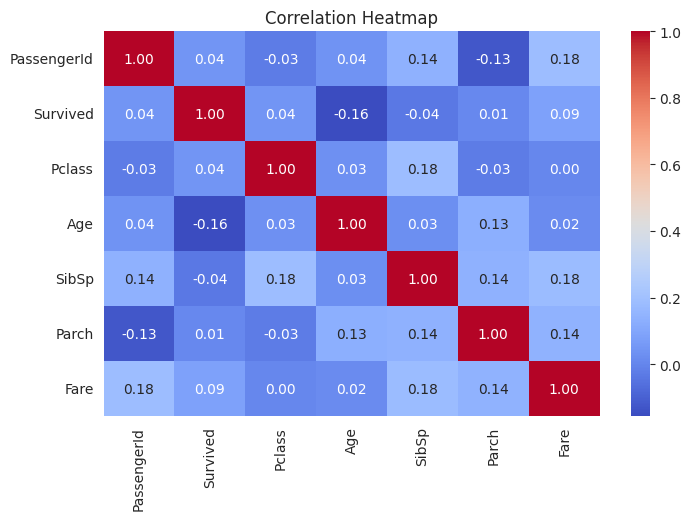

In [ ]:
# Heatmap for correlation between numerical variables
plt.figure(figsize=(8, 5))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-14-11c326eed1e0>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=data, ci=None)


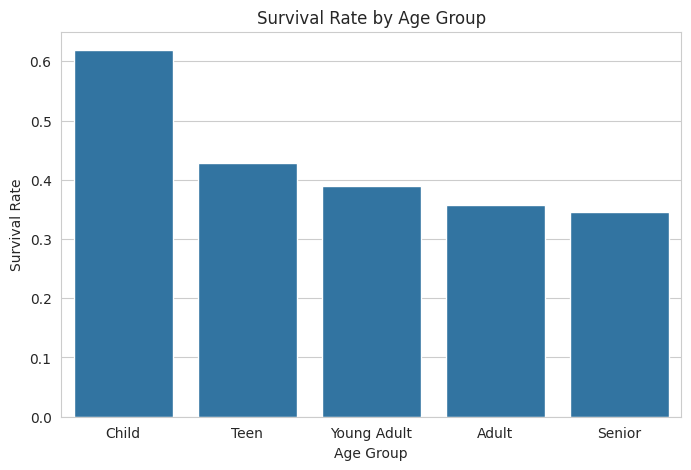

In [ ]:
# Survival rate by Age Groups
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins, labels=labels)

plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Survived', data=data, ci=None)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

# Descriptive analysis


In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Create a synthetic dataset
def generate_random_date(start, end, n):
    start_date = datetime.strptime(start, "%Y-%m-%d")
    end_date = datetime.strptime(end, "%Y-%m-%d")
    return [(start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds())))).strftime("%Y-%m-%d %H:%M:%S") for _ in range(n)]

In [ ]:
n_transactions = 200
random.seed(42)

In [ ]:
# Creating data
data = {
    "Transaction ID": [f"T{i:04d}" for i in range(1, n_transactions + 1)],
    "Customer ID": [f"C{i:03d}" for i in random.choices(range(1, 51), k=n_transactions)],
    "Purchase Date": generate_random_date("2023-01-01", "2023-12-31", n_transactions),
    "Product Category": random.choices(["Electronics", "Clothing", "Groceries", "Home & Living", "Sports"], k=n_transactions),
    "Quantity": random.choices(range(1, 6), k=n_transactions),
    "Price": [round(random.uniform(5, 500), 2) for _ in range(n_transactions)],
    "Payment Method": random.choices(["Credit Card", "Cash", "Digital Payment"], k=n_transactions),
    "Location": random.choices([f"Store-{i}" for i in range(1, 6)], k=n_transactions)
}

In [ ]:
# Create a DataFrame
df = pd.DataFrame(data)

In [ ]:
# Save dataset to a CSV file
df.to_csv("XYZ_Retail_Transactions.csv", index=False)
print("Dataset saved as 'XYZ_Retail_Transactions.csv'.")

Dataset saved as 'XYZ_Retail_Transactions.csv'.


# Step 2: Load the dataset



In [ ]:
#loading the dataset
data = pd.read_csv("XYZ_Retail_Transactions.csv")
data.head()

,Transaction ID,Customer ID,Purchase Date,Product Category,Quantity,Price,Payment Method,Location
0,T0001,C032,2023-02-06 05:16:19,Sports,3,286.76,Digital Payment,Store-5
1,T0002,C002,2023-12-26 18:21:57,Home & Living,1,147.86,Credit Card,Store-4
2,T0003,C014,2023-10-20 15:44:22,Sports,2,66.56,Cash,Store-2
3,T0004,C012,2023-11-26 14:25:03,Sports,2,345.90,Cash,Store-3
4,T0005,C037,2023-04-02 19:12:59,Clothing,2,351.37,Digital Payment,Store-2


# Step 3: Perform Descriptive Analysis

In [ ]:
# Cleaning the data
data["Purchase Date"] = pd.to_datetime(data["Purchase Date"])
data.head()

,Transaction ID,Customer ID,Purchase Date,Product Category,Quantity,Price,Payment Method,Location
0,T0001,C032,2023-02-06 05:16:19,Sports,3,286.76,Digital Payment,Store-5
1,T0002,C002,2023-12-26 18:21:57,Home & Living,1,147.86,Credit Card,Store-4
2,T0003,C014,2023-10-20 15:44:22,Sports,2,66.56,Cash,Store-2
3,T0004,C012,2023-11-26 14:25:03,Sports,2,345.90,Cash,Store-3
4,T0005,C037,2023-04-02 19:12:59,Clothing,2,351.37,Digital Payment,Store-2


In [ ]:
# Calculate summary statistics
print("Total Sales:", data["Price"].sum())
print("Average Transaction Value:", data["Price"].mean())
print("Number of Transactions per Month:")
print(data.groupby(data["Purchase Date"].dt.to_period("M")).size())
print("Distribution of Purchases by Product Category:")
print(data["Product Category"].value_counts())
print("Average Quantity Purchased per Transaction:", data["Quantity"].mean())

Total Sales: 54320.57
Average Transaction Value: 271.60285
Number of Transactions per Month:
Purchase Date
2023-01    22
2023-02    17
2023-03    15
2023-04    23
2023-05    11
2023-06    15
2023-07    16
2023-08    20
2023-09    15
2023-10    13
2023-11    13
2023-12    20
Freq: M, dtype: int64
Distribution of Purchases by Product Category:
Product Category
Home & Living    44
Clothing         42
Sports           41
Groceries        40
Electronics      33
Name: count, dtype: int64
Average Quantity Purchased per Transaction: 3.0


# Step 4: Data Visualization

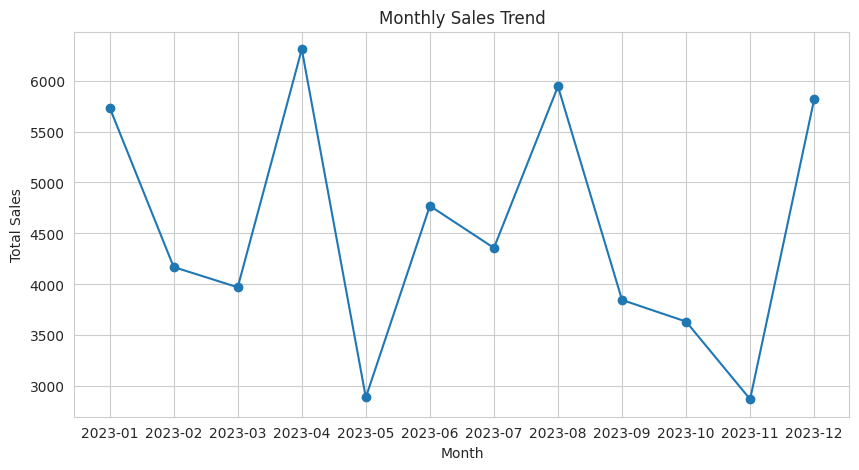

In [ ]:
# Sales trends over the year
sales_trend = data.groupby(data["Purchase Date"].dt.to_period("M"))['Price'].sum()
plt.figure(figsize=(10, 5))
plt.plot(sales_trend.index.astype(str), sales_trend, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

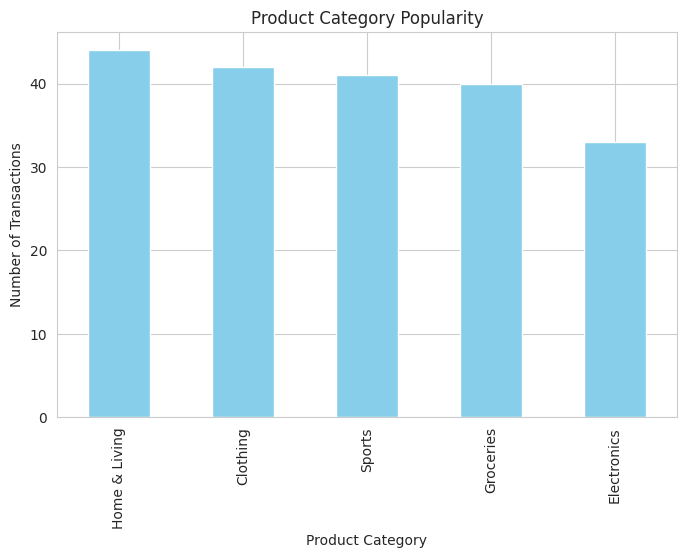

In [ ]:
# Bar chart of product category popularity
plt.figure(figsize=(8, 5))
data["Product Category"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Product Category Popularity")
plt.xlabel("Product Category")
plt.ylabel("Number of Transactions")
plt.show()

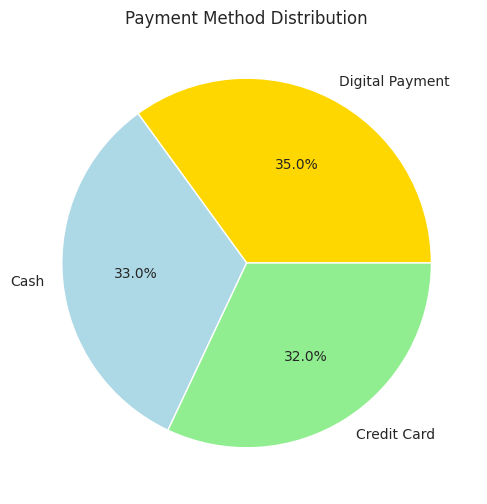

In [ ]:
# Pie chart of payment methods
payment_methods = data["Payment Method"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(payment_methods, labels=payment_methods.index, autopct="%1.1f%%", colors=["gold", "lightblue", "lightgreen"])
plt.title("Payment Method Distribution")
plt.show()

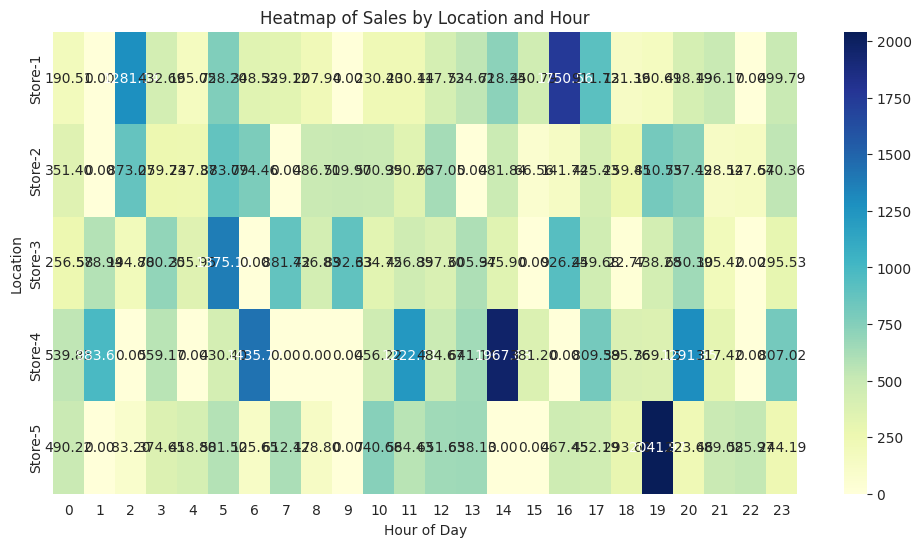

In [ ]:
# Heatmap of sales by location and time of day
data["Hour"] = data["Purchase Date"].dt.hour
sales_heatmap = pd.pivot_table(data, values="Price", index="Location", columns="Hour", aggfunc="sum", fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Heatmap of Sales by Location and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Location")
plt.show()

In [ ]:
# Step 5: Customer Segmentation
customer_segments = data.groupby("Customer ID").agg({
    "Price": "sum",
    "Transaction ID": "count"
}).rename(columns={"Price": "Total Spend", "Transaction ID": "Transaction Count"})

# Define high and low frequency customers
high_frequency = customer_segments[customer_segments["Transaction Count"] > customer_segments["Transaction Count"].median()]
low_frequency = customer_segments[customer_segments["Transaction Count"] <= customer_segments["Transaction Count"].median()]

print("High-Frequency Customers:")
print(high_frequency)
print("Low-Frequency Customers:")
print(low_frequency)

High-Frequency Customers:
             Total Spend  Transaction Count
Customer ID                                
C004             1344.34                  5
C005             2107.51                  7
C011             2063.23                  7
C012             2488.91                 10
C014             3143.91                 10
C022             1733.29                  8
C027             1700.04                  6
C028             1765.35                  5
C032             1506.30                  6
C033             1199.54                  5
C037             1768.19                  6
C039             1629.81                  5
C044             3209.80                 10
C050             2083.58                  6
Low-Frequency Customers:
             Total Spend  Transaction Count
Customer ID                                
C001              967.75                  4
C002              579.88                  4
C003              818.81                  4
C006             1077.44 

#Diagnostic Analysis of Sales Decline

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

#Creating Sample dataset

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Create sample Sales Data
sales_data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', end='2023-12-31'),
    'product_category': np.random.choice(['Electronics', 'Clothing', 'Home Appliances'], 365),
    'transaction_amount': np.random.randint(10, 500, 365),
    'customer_id': np.random.randint(1, 101, 365)
})
sales_data.to_csv('sales_data.csv', index=False)

In [ ]:
# Create sample Inventory Data
inventory_data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', end='2023-12-31'),
    'product_category': np.random.choice(['Electronics', 'Clothing', 'Home Appliances'], 365),
    'inventory_levels': np.random.randint(0, 100, 365)
})
inventory_data.to_csv('inventory_data.csv', index=False)

In [ ]:
# Create sample Customer Feedback Data
customer_feedback = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', end='2023-12-31'),
    'customer_satisfaction_score': np.random.randint(1, 6, 365),
    'customer_feedback_text': np.random.choice(
        ['Great service', 'Stock issues', 'High prices', 'Poor quality', 'Excellent variety'],
        365
    )
})
customer_feedback.to_csv('customer_feedback.csv', index=False)

In [ ]:
# Create sample Market Data
market_data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', end='2023-12-31'),
    'regional_economic_index': np.random.uniform(0.5, 1.5, 365),
    'competitor_pricing_index': np.random.uniform(0.8, 1.2, 365),
    'market_trend_score': np.random.uniform(0.7, 1.3, 365)
})
market_data.to_csv('market_data.csv', index=False)

print("Sample datasets created and saved as CSV files.")

Sample datasets created and saved as CSV files.


# Step 1: Data Collection and Preparation

In [ ]:
# Load datasets
sales_data = pd.read_csv('sales_data.csv')
inventory_data = pd.read_csv('inventory_data.csv')
customer_feedback = pd.read_csv('customer_feedback.csv')
market_data = pd.read_csv('market_data.csv')

In [ ]:
# Consolidate and clean datasets
data = pd.merge(sales_data, inventory_data, on='date', how='left')
data = pd.merge(data, customer_feedback, on='date', how='left')
data = pd.merge(data, market_data, on='date', how='left')

In [ ]:
# Normalize data and filling the missing value by 0

sales_data['product_category'] = pd.factorize(sales_data['product_category'])[0]
inventory_data['product_category'] = pd.factorize(inventory_data['product_category'])[0]

#merging dataset
data = pd.merge(sales_data, inventory_data, on=['date', 'product_category'], how='left')
data = pd.merge(data, customer_feedback, on='date', how='left')
data = pd.merge(data, market_data, on='date', how='left')

data.fillna(0, inplace=True)

# Step 2: Trend Analysis

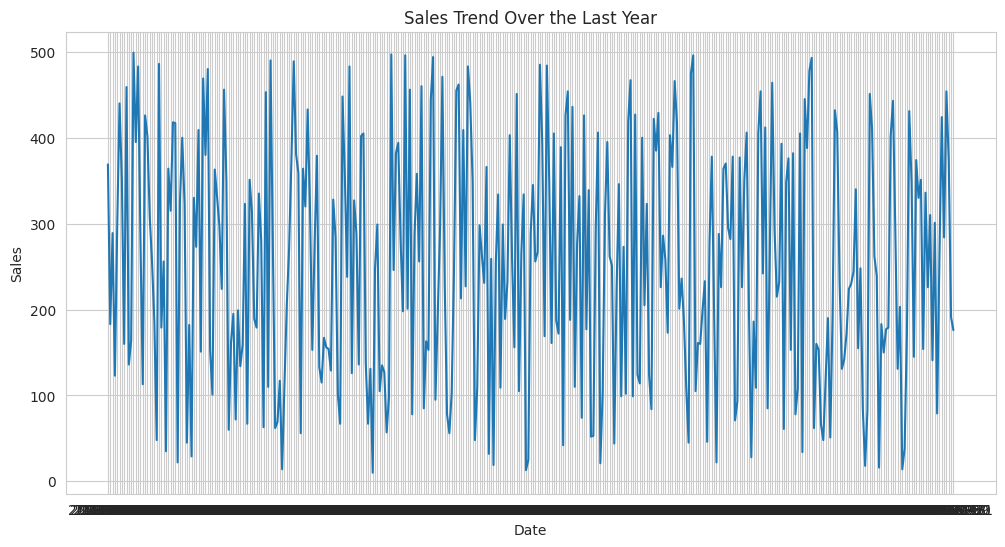

In [ ]:
# Analyze sales trends over the last year
sales_trend = data.groupby('date')['transaction_amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='transaction_amount', data=sales_trend)
plt.title('Sales Trend Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Identify periods of significant decline
# For simplicity, consider a 10% decline over a month as significant
rolling_sales = sales_trend['transaction_amount'].rolling(window=30).mean() # Changed 'sales' to 'transaction_amount'
significant_decline = (sales_trend['transaction_amount'] < 0.9 * rolling_sales).sum() # Changed 'sales' to 'transaction_amount'
print(f"Periods of Significant Sales Decline: {significant_decline}")

Periods of Significant Sales Decline: 151


# Step 3: Correlation Analysis

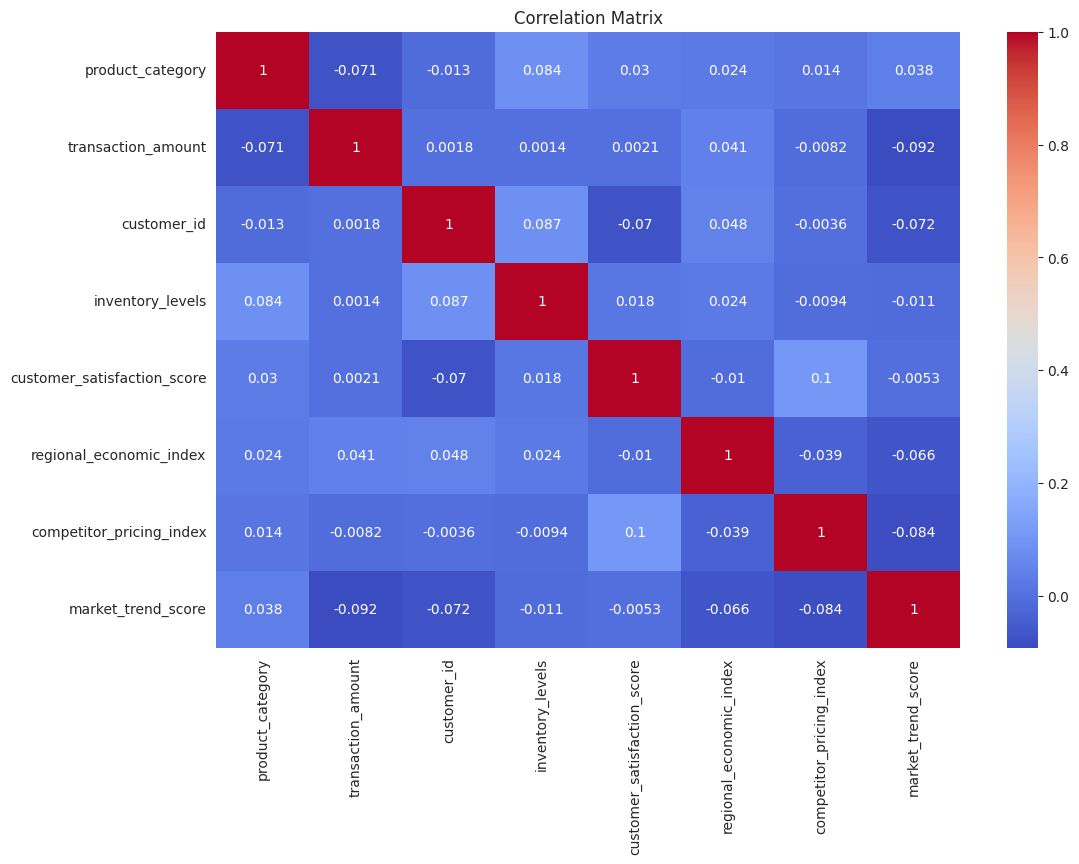

In [ ]:
# Correlate sales decline with other variables
# Exclude the 'date' column, as it's not numerical
numerical_data = data.select_dtypes(include=np.number)  # Select only numerical columns
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Example correlation with inventory levels
# Use 'transaction_amount' instead of 'sales'
# Drop rows with NaN values in 'transaction_amount' and 'inventory_levels'
valid_data = data.dropna(subset=['transaction_amount', 'inventory_levels'])
inventory_correlation, _ = pearsonr(valid_data['transaction_amount'], valid_data['inventory_levels'])
print(f"Correlation between sales and inventory levels: {inventory_correlation}")

Correlation between sales and inventory levels: 0.0013636601311809422


# Step 4: Segmentation Analysis

In [ ]:
# Segment customers based on behaviors
# Calculate purchase frequency and average transaction size first
data['purchase_frequency'] = data.groupby('customer_id')['transaction_amount'].transform('count')
data['average_transaction_size'] = data.groupby('customer_id')['transaction_amount'].transform('mean')

# Now perform the groupby and aggregation
customer_segments = data.groupby('customer_id').agg({
    'purchase_frequency': 'mean',
    'average_transaction_size': 'mean'
}).reset_index()

In [ ]:
# Analysis of segments
low_frequency_segment = customer_segments[customer_segments['purchase_frequency'] < 2]
high_value_segment = customer_segments[customer_segments['average_transaction_size'] > 100]

print(f"Low Frequency Segment: {len(low_frequency_segment)} customers")
print(f"High Value Segment: {len(high_value_segment)} customers")

Low Frequency Segment: 13 customers
High Value Segment: 92 customers


# Step 6: Synthesis of Findings

In [ ]:
# Integrate quantitative and qualitative data
# Assuming root cause analysis linked inventory management with sales decline
findings = {
    "Sales Trend Analysis": sales_trend,
    "Correlation Analysis": correlation_matrix,
    "Customer Segmentation": customer_segments,
    "Key Factors Identified": ["Inventory mismanagement", "Economic downturn", "Customer preferences shift"]
}

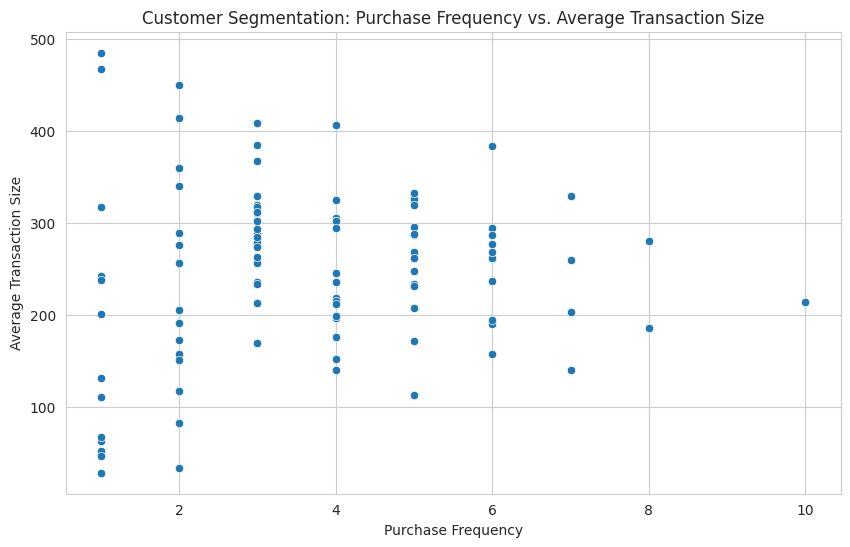

In [ ]:
# Visualizations for presentation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_frequency', y='average_transaction_size', data=customer_segments)
plt.title('Customer Segmentation: Purchase Frequency vs. Average Transaction Size')
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Transaction Size')
plt.show()

#Data Wrangling

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [ ]:
# Generate sample sales data
np.random.seed(0)
sales_data = pd.DataFrame({
    'customer_id': np.random.randint(1000, 2000, 500),
    'purchase_amount': np.random.uniform(10, 500, 500),
    'product_id': np.random.randint(1, 100, 500),
    'timestamp': pd.date_range(start='2020-01-01', periods=500, freq='D')
})

In [ ]:
# Generate sample customer information
customer_info = pd.DataFrame({
    'customer_id': np.unique(sales_data['customer_id']),
    'age': np.random.randint(18, 70, len(sales_data['customer_id'].unique())),
    'gender': np.random.choice(['M', 'F'], len(sales_data['customer_id'].unique())),
    'location': np.random.choice(['North', 'South', 'East', 'West'], len(sales_data['customer_id'].unique())),
    # Changed freq to 'D' to generate dates within a day instead of a year
    'account_creation_date': pd.date_range(start='2015-01-01', periods=len(sales_data['customer_id'].unique()), freq='D')
})

In [ ]:
# Generate sample customer service records
customer_service = pd.DataFrame({
    'customer_id': np.random.choice(sales_data['customer_id'], 200),
    'inquiry_id': np.random.randint(1, 50, 200),
    'complaint': np.random.choice(['Delay in delivery', 'Incorrect product', 'Billing issue', 'Quality issue'], 200),
    'resolution': np.random.choice(['Resolved', 'Pending', 'Escalated'], 200),
    'timestamp': pd.date_range(start='2020-01-01', periods=200, freq='W')
})

In [ ]:
# Generate sample marketing interaction data
marketing_data = pd.DataFrame({
    'customer_id': np.random.choice(sales_data['customer_id'], 300),
    'campaign_id': np.random.randint(1, 10, 300),
    'email_opened': np.random.randint(0, 2, 300),
    'email_clicked': np.random.randint(0, 2, 300),
    'timestamp': pd.date_range(start='2020-01-01', periods=300, freq='W')
})

In [ ]:
# Show first few records from each dataset
sales_data.head(), customer_info.head(), customer_service.head(), marketing_data.head()

(   customer_id  purchase_amount  product_id  timestamp
 0         1684       280.574310          58 2020-01-01
 1         1559       296.393274          59 2020-01-02
 2         1629       481.348825          89 2020-01-03
 3         1192       153.152288          77 2020-01-04
 4         1835       128.006102          14 2020-01-05,
    customer_id  age gender location account_creation_date
 0         1004   38      M    South            2015-01-01
 1         1009   20      M     East            2015-01-02
 2         1011   43      F    South            2015-01-03
 3         1013   18      M    North            2015-01-04
 4         1016   49      F     West            2015-01-05,
    customer_id  inquiry_id          complaint resolution  timestamp
 0         1890           7      Billing issue   Resolved 2020-01-05
 1         1633          25  Delay in delivery   Resolved 2020-01-12
 2         1209          11  Incorrect product  Escalated 2020-01-19
 3         1448          44  Del

#Data Assessment

In [ ]:
# Assessing data quality
print("Sales Data - Missing values:\n", sales_data.isnull().sum())
print("Customer Information - Missing values:\n", customer_info.isnull().sum())
print("Customer Service Records - Missing values:\n", customer_service.isnull().sum())
print("Marketing Interaction Data - Missing values:\n", marketing_data.isnull().sum())

Sales Data - Missing values:
 customer_id        0
purchase_amount    0
product_id         0
timestamp          0
dtype: int64
Customer Information - Missing values:
 customer_id              0
age                      0
gender                   0
location                 0
account_creation_date    0
dtype: int64
Customer Service Records - Missing values:
 customer_id    0
inquiry_id     0
complaint      0
resolution     0
timestamp      0
dtype: int64
Marketing Interaction Data - Missing values:
 customer_id      0
campaign_id      0
email_opened     0
email_clicked    0
timestamp        0
dtype: int64


In [ ]:
# Check for duplicates
print("Sales Data - Duplicates:\n", sales_data.duplicated().sum())
print("Customer Information - Duplicates:\n", customer_info.duplicated().sum())
print("Customer Service Records - Duplicates:\n", customer_service.duplicated().sum())
print("Marketing Interaction Data - Duplicates:\n", marketing_data.duplicated().sum())

Sales Data - Duplicates:
 0
Customer Information - Duplicates:
 0
Customer Service Records - Duplicates:
 0
Marketing Interaction Data - Duplicates:
 0


In [ ]:
# Handling missing values
sales_data.dropna(inplace=True)
customer_info.dropna(inplace=True)
customer_service.dropna(inplace=True)
marketing_data.dropna(inplace=True)

In [ ]:
# Remove duplicates
sales_data.drop_duplicates(inplace=True)
customer_info.drop_duplicates(inplace=True)
customer_service.drop_duplicates(inplace=True)
marketing_data.drop_duplicates(inplace=True)

In [ ]:
# Standardize categorical variables
customer_info['gender'] = customer_info['gender'].str.upper()

In [ ]:
# Convert timestamps
sales_data['timestamp'] = pd.to_datetime(sales_data['timestamp'])
customer_info['account_creation_date'] = pd.to_datetime(customer_info['account_creation_date'])
customer_service['timestamp'] = pd.to_datetime(customer_service['timestamp'])
marketing_data['timestamp'] = pd.to_datetime(marketing_data['timestamp'])


In [ ]:
# Derive new features
sales_data['purchase_month'] = sales_data['timestamp'].dt.to_period('M')
customer_info['customer_tenure'] = (datetime.now() - customer_info['account_creation_date']).dt.days // 30

In [ ]:
# Aggregate data
monthly_sales_summary = sales_data.groupby('purchase_month').agg({'purchase_amount': 'sum', 'customer_id': 'nunique'}).reset_index()

In [ ]:
# Merge datasets
merged_data = pd.merge(sales_data, customer_info, on='customer_id', how='left')
merged_data = pd.merge(merged_data, customer_service, on='customer_id', how='left')
merged_data = pd.merge(merged_data, marketing_data, on='customer_id', how='left')

In [ ]:
# Check for consistency
merged_data.head()

,customer_id,purchase_amount,product_id,timestamp_x,purchase_month,age,gender,location,account_creation_date,customer_tenure,inquiry_id,complaint,resolution,timestamp_y,campaign_id,email_opened,email_clicked,timestamp
0,1684,280.574310,58,2020-01-01,2020-01,39,M,West,2015-09-17,112,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
1,1559,296.393274,59,2020-01-02,2020-01,54,M,North,2015-08-02,114,9.0,Billing issue,Pending,2023-02-12,NaN,NaN,NaN,NaT
2,1559,296.393274,59,2020-01-02,2020-01,54,M,North,2015-08-02,114,8.0,Incorrect product,Pending,2023-07-09,NaN,NaN,NaN,NaT
3,1629,481.348825,89,2020-01-03,2020-01,22,F,West,2015-08-31,113,NaN,NaN,NaN,NaT,2.0,0.0,0.0,2020-07-12
4,1192,153.152288,77,2020-01-04,2020-01,21,F,South,2015-03-21,118,31.0,Quality issue,Pending,2023-01-01,6.0,0.0,1.0,2020-10-04


In [ ]:
# Documentation
report = {
    'Data Sources': ['Sales Data', 'Customer Information', 'Customer Service Records', 'Marketing Interaction Data'],
    'Cleaning Methods': [
        'Removed missing values using dropna()',
        'Dropped duplicate records using drop_duplicates()',
        'Standardized categorical variables (e.g., gender, location)',
        'Converted date fields to datetime objects'
    ],
    'Transformations Applied': [
        'Derived purchase_month and customer_tenure',
        'Aggregated monthly sales summary',
        'Merged data into a unified dataset using customer_id as key'
    ]
}

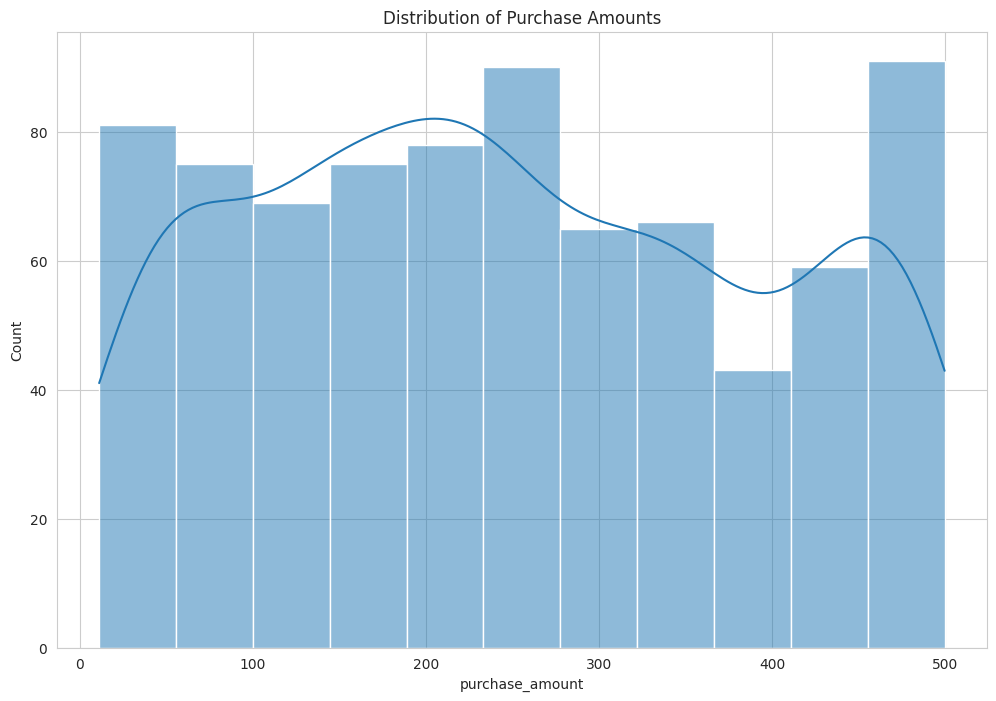

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(merged_data['purchase_amount'], kde=True)
plt.title('Distribution of Purchase Amounts')
plt.show()

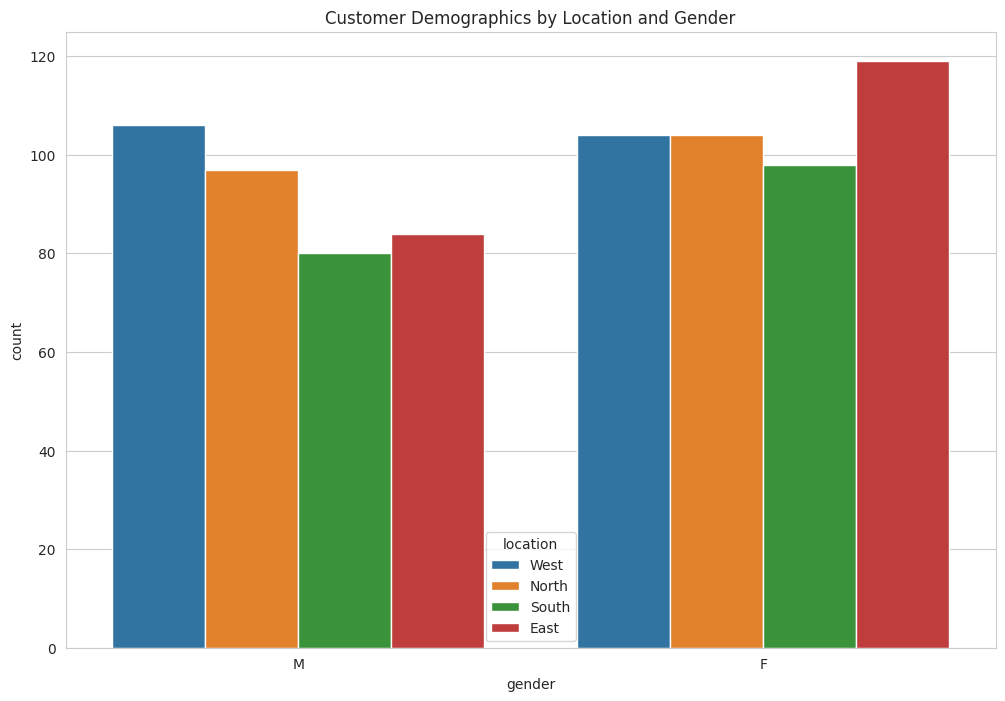

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='gender', data=merged_data, hue='location')
plt.title('Customer Demographics by Location and Gender')
plt.show()

In [ ]:
# Output final cleaned dataset
merged_data.to_csv('cleaned_customer_data.csv', index=False)

#Data Quality

In [ ]:
from datetime import datetime, timedelta

In [ ]:
np.random.seed(0)
transactions = pd.DataFrame({
    'transaction_id': np.arange(1, 1001),
    'customer_id': np.random.randint(1, 301, 1000),
    'amount': np.random.uniform(5, 200, 1000),
    'date': pd.date_range(start='2020-01-01', periods=1000, freq='D'),
    'product_id': np.random.randint(1, 50, 1000)
})

In [ ]:
# Sample customer information data
np.random.seed(1)
customer_info = pd.DataFrame({
    'customer_id': np.unique(transactions['customer_id']),
    'name': np.random.choice(['John Doe', 'Jane Smith', 'Mary Johnson'], len(transactions['customer_id'].unique())),
    'age': np.random.randint(18, 80, len(transactions['customer_id'].unique())),
    'gender': np.random.choice(['M', 'F'], len(transactions['customer_id'].unique())),
    'location': np.random.choice(['North', 'South', 'East', 'West'], len(transactions['customer_id'].unique())),
    # Changed freq to 'D' to generate dates within a reasonable range
    'registration_date': pd.date_range(start='2015-01-01', periods=len(transactions['customer_id'].unique()), freq='D')
})

In [ ]:
# Sample support tickets data
np.random.seed(2)
support_tickets = pd.DataFrame({
    'ticket_id': np.arange(1, 501),
    'customer_id': np.random.choice(transactions['customer_id'], 500),
    'issue_description': np.random.choice(['Delayed shipment', 'Wrong product', 'Damaged goods', 'Billing issue'], 500),
    'resolution_status': np.random.choice(['Resolved', 'Pending', 'Escalated'], 500),
    'timestamp': pd.date_range(start='2020-01-01', periods=500, freq='D')
})

In [ ]:
# Show first few records from each dataset
transactions.head(), customer_info.head(), support_tickets.head()

(   transaction_id  customer_id      amount       date  product_id
 0               1          173   94.054081 2020-01-01           5
 1               2           48  165.835553 2020-01-02          38
 2               3          118  135.378140 2020-01-03          41
 3               4          193  111.453931 2020-01-04          32
 4               5          252  119.818283 2020-01-05          28,
    customer_id        name  age gender location registration_date
 0            1  Jane Smith   39      M    South        2015-01-01
 1            3    John Doe   64      M     West        2015-01-02
 2            4    John Doe   78      M    North        2015-01-03
 3            5  Jane Smith   21      M     East        2015-01-04
 4            6  Jane Smith   74      M     East        2015-01-05,
    ticket_id  customer_id issue_description resolution_status  timestamp
 0          1          217     Damaged goods         Escalated 2020-01-01
 1          2          158     Billing issue  

In [ ]:
# Data profiling for customer transactions
transactions_profile = transactions.describe(include='all')
transactions_profile['missing_values'] = transactions.isnull().sum()

In [ ]:
# Data profiling for customer information
customer_info_profile = customer_info.describe(include='all')
customer_info_profile['missing_values'] = customer_info.isnull().sum()

In [ ]:
# Data profiling for support tickets
support_tickets_profile = support_tickets.describe(include='all')
support_tickets_profile['missing_values'] = support_tickets.isnull().sum()

transactions_profile, customer_info_profile, support_tickets_profile

(       transaction_id  customer_id       amount                 date  \
 count     1000.000000  1000.000000  1000.000000                 1000   
 mean       500.500000   152.920000   103.079703  2021-05-14 12:00:00   
 min          1.000000     1.000000     5.011811  2020-01-01 00:00:00   
 25%        250.750000    84.000000    53.307340  2020-09-06 18:00:00   
 50%        500.500000   151.000000   103.598986  2021-05-14 12:00:00   
 75%        750.250000   225.000000   152.587310  2022-01-19 06:00:00   
 max       1000.000000   300.000000   199.971496  2022-09-26 00:00:00   
 std        288.819436    84.272958    56.633143                  NaN   
 
         product_id  missing_values  
 count  1000.000000             NaN  
 mean     25.563000             NaN  
 min       1.000000             NaN  
 25%      12.000000             NaN  
 50%      27.000000             NaN  
 75%      39.000000             NaN  
 max      49.000000             NaN  
 std      14.854113             NaN  

In [ ]:
# Establish data quality metrics
metrics = {
    'transaction_error_rate': transactions[transactions.duplicated(subset=['transaction_id'])].shape[0] / transactions.shape[0],
    'duplicate_customers': customer_info[customer_info.duplicated(subset=['customer_id'])].shape[0],
    'invalid_dates_transactions': transactions[~transactions['date'].apply(lambda x: isinstance(x, pd.Timestamp))].shape[0],
    'inconsistent_gender': customer_info[~customer_info['gender'].isin(['M', 'F'])].shape[0],
    'pending_support_tickets': support_tickets[support_tickets['resolution_status'] == 'Pending'].shape[0]
}

metrics

{'transaction_error_rate': 0.0,
 'duplicate_customers': 0,
 'invalid_dates_transactions': 0,
 'inconsistent_gender': 0,
 'pending_support_tickets': 178}

In [ ]:
# Removing duplicates
transactions.drop_duplicates(subset='transaction_id', inplace=True)
customer_info.drop_duplicates(subset='customer_id', inplace=True)
support_tickets.drop_duplicates(subset='ticket_id', inplace=True)

In [ ]:
# Correcting errors in date formats
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

In [ ]:
# Filling missing values in customer age
customer_info['age'].fillna(customer_info['age'].mean(), inplace=True)

<ipython-input-76-3137a389ca67>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_info['age'].fillna(customer_info['age'].mean(), inplace=True)


In [ ]:
# Validation rules
def validate_transaction(row):
    if row['amount'] < 0 or row['product_id'] <= 0:
        return False
    return True

transactions['valid_transaction'] = transactions.apply(validate_transaction, axis=1)
valid_transactions_count = transactions[transactions['valid_transaction']].shape[0]
invalid_transactions_count = transactions[~transactions['valid_transaction']].shape[0]
valid_transactions_count, invalid_transactions_count

(1000, 0)

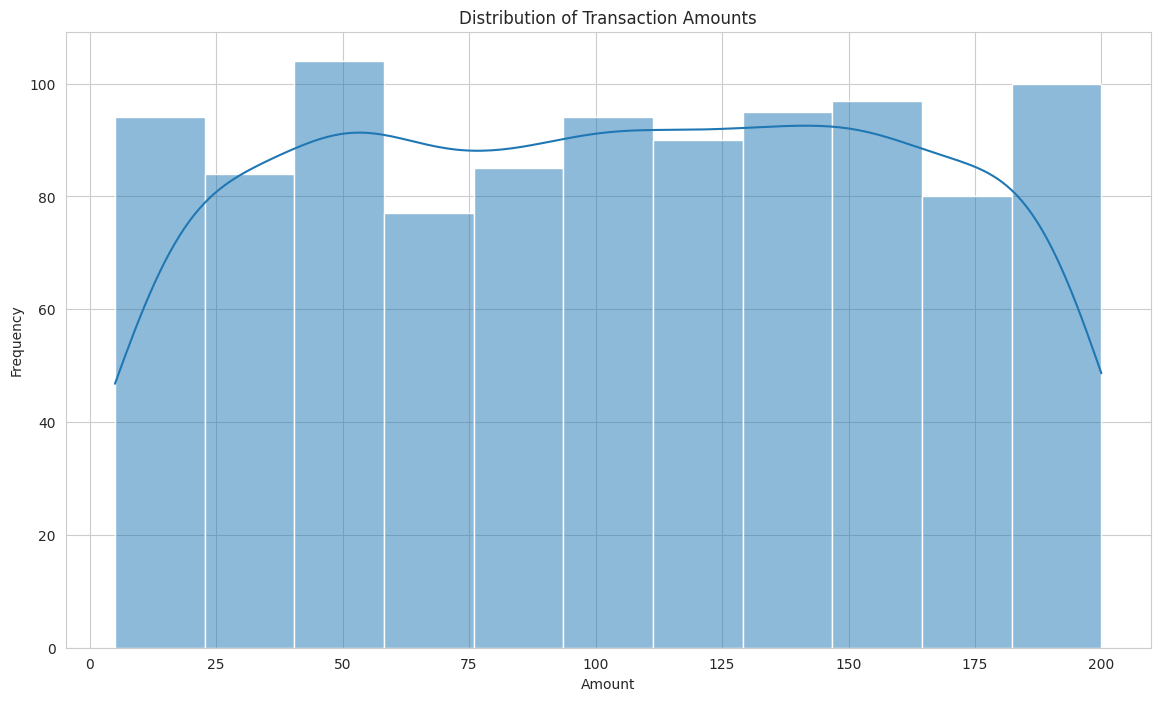

In [ ]:
# Real-time data quality monitoring dashboard
plt.figure(figsize=(14, 8))
sns.histplot(transactions['amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

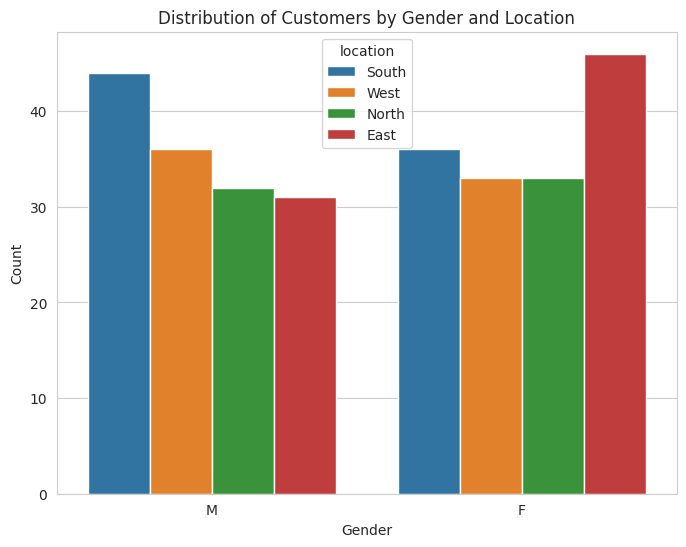

In [ ]:
# Monitor for duplicate customers
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='location', data=customer_info)
plt.title('Distribution of Customers by Gender and Location')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()